# News Title Classification Project

Thank you for the opportunity that has been given. I really enjoy to make data science project, especially in NLP and Computer vision task. I will split this classification task into 3 part:

* Data Cleaning & EDA (this notebook)
<hr>
* Modeling:
    * LSTM / GRU
    * Transformer
<hr>
* Production

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

import warnings
warnings.filterwarnings('ignore')

# plt.style.use('fivethirtyeight')

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

plt.rcParams['figure.figsize'] = [14, 8]

pd.set_option('display.max_colwidth', -1)

In [2]:
news_df = pd.read_excel('../input/gtect-project/News Title.xls')
# spam_df = pd.read_excel('../input/gtect-project/Comment Spam.xls')

print('News dataframe shape:', news_df.shape)

News dataframe shape: (65535, 3)


## EDA & Data cleaning

I found 5 problems:

1. Redundant words (don't help our model to make a prediction)
1. Outliers (some text length too long)
1. Duplicated news title and mislabeled category
1. Class imbalance
1. Same words are often used in most category

In [3]:
# There are no missing values

news_df.isna().sum()

No            0
News Title    0
Category      0
dtype: int64

### Problem no. 1: redundant words (don't help our model to make a prediction)

* In my opinion, some content in News Title will not help our model to make a prediction
* Example: \n (newline), \t (tab), number, punctuation, http / www
* I decided to clean these redundant words from our dataset

In [4]:
def text_cleaning(text):
    
    # make lowercase
    text = text.lower()
    
    # delete \n, \t and http, i found it in lndex 29159, 38806, 53162, 62852
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\t', ' ', text)
    text = re.sub(r'https?://\S+', ' ', text)
    text = re.sub(r'www\.\S+', ' ', text)
    
    # before use word embedding, i decided to convert these abbreviated words to their original form
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"i'd", "i would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    
    # keep only words, remove number and punctuation
    # since number doesn't help our model to make a classification in this case, i decided to remove it
    text = re.sub('[^a-z ]', ' ', text)
    
    tokenizer = text.split()
    
    return ' '.join([text for text in tokenizer])

# for checking after cleaning
news_df_original = news_df.copy()

news_df['News Title'] = news_df['News Title'].apply(text_cleaning)

### Example

    NOTES: although some redundant / error words still exist, we can handle this problem with word embedding later

In [5]:
print('Before cleaning:\n')
print(news_df_original['News Title'].loc[29159])
print('')
print('After cleaning:\n')
print(news_df['News Title'].loc[29159])

Before cleaning:

I don't know why I'm a sex symbol' says smouldering hunk of manliness Jon  ...	http://www.irishexaminer.com/breakingnews/entertainment/i-dont-know-why-im-a-sex-symbol-says-smouldering-hunk-of-manliness-jon-hamm-627395.html	Irish Examiner	e	dQp_0Hv3qTdoGMMXikOnSJKtYXH-M	www.irishexaminer.com	1397237964614
98713	TV looks to the past for stories with timeless appeal	http://www.app.com/usatoday/article/7171627	Asbury Park Press	e	dQp_0Hv3qTdoGMMXikOnSJKtYXH-M	www.app.com	1397237964971
98714	Tuned In: AMC's 'Mad Men' begins a 2-part final season	http://www.post-gazette.com/ae/tv-radio/2014/04/09/Tuned-In-AMC-s-Mad-Men-begins-a-2-part-final-season/stories/201404090034	Pittsburgh Post-Gazette	e	dQp_0Hv3qTdoGMMXikOnSJKtYXH-M	www.post-gazette.com	1397237965273
98715	Mad Men" end in sight for Matthew Weiner with new season

After cleaning:

i do not know why i am a sex symbol says smouldering hunk of manliness jon irish examiner e dqp hv qtdogmmxikonsjktyxh m tv looks to the pa

### Problem no.2 : Outliers (some text length too long)

* Without outliers, News Title has mean length: 53, and max length: 87
* But i found 3 outliers which have text length more than 90 words
* I decided to remove these outliers, so that our model doesn't need a long MAXLEN

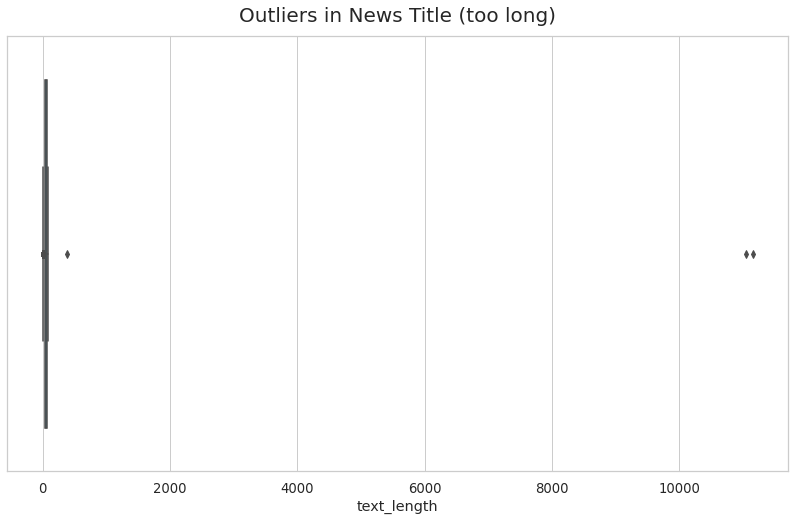

In [6]:
news_df['text_length'] = news_df['News Title'].str.len()

sns.boxplot(news_df['text_length'])
plt.title('Outliers in News Title (too long)', fontsize=20, pad=15)
plt.show()

In [7]:
outliers_ = len(news_df[news_df['text_length'] > 90])

print(f'There are {outliers_} outliers which have text length more than 90 words')

There are 3 outliers which have text length more than 90 words


In [8]:
# Remove these outliers
OUTLIERS = news_df[news_df['text_length'] > 90].index.tolist()

news_df.drop(OUTLIERS, axis=0, inplace=True)

### Problem no.3: Duplicated news title and mislabeled category

* I have read [here](https://www.quora.com/What-happens-if-I-double-the-same-data-that-was-duplicated-for-classification-in-machine-learning-What-kind-of-impact-does-it-have#:~:text=When%20you%20duplicate%20the%20same,dependent%20and%20independent%20variable%20combinations.), they said duplicated values won't help at all, even can make our model overfit
* There are many mislabeled title, especially from business and technology category
* Since our datasets was made by human (hand-labeling), also some of News Title actually has a multi-label, this cause our dataset has a duplicated title with different label category

<hr>

    Since our goal is not a MULTI-LABEL classification (only choose one), so i decided to drop some news title that could cause BIAS to our classification

In [9]:
total_duplicated_newstitle = news_df['News Title'].duplicated().sum()

print(f'This dataset has {total_duplicated_newstitle} duplicated news title')

This dataset has 836 duplicated news title


In [10]:
# Example from mislabeled category
# This can confuse our model to make a classification

news_df[news_df['News Title'] == 'business news']

,No,News Title,Category,text_length
3883,3884,business news,Business,13
10411,10412,business news,Technology,13
18422,18423,business news,Technology,13


In [11]:
# at a glance, we will classify this as Business category
# But if we think more deeper, this title also has a relationship with medical (for protect their pet's health)

news_df[news_df['News Title'] == 'pet food retailer petsmart says it will stop selling pet treats from china by early']

,No,News Title,Category,text_length
19861,19862,pet food retailer petsmart says it will stop selling pet treats from china by early,Medical,83
55482,55483,pet food retailer petsmart says it will stop selling pet treats from china by early,Business,83


### How to get mislabeled category list?

* These title have a multi-labeled category

In [12]:
df_mislabeled = news_df.groupby(['News Title']).nunique().sort_values(by='Category', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['Category'] > 1]
df_mislabeled.index.tolist()[:5]

['click the phrases to see a list',
 'posted by parvez jabri',
 'things to know for today',
 'welcome to the new news com',
 'share this on']

## How to handle this problem (3 ways)

* DROP ALL: this title does not help to make a classification
* Keep correct category, delete mislabeled category
* Because of both label are incorrect, so i changed to correct one

In [13]:
## PART 1
# drop all, this title does not help to make a classification
to_drop_1 = news_df[news_df['News Title'] == 'click the phrases to see a list'].index.tolist()
to_drop_2 = news_df[news_df['News Title'] == 'share this on'].index.tolist()
to_drop_3 = news_df[news_df['News Title'] == 'posted by parvez jabri'].index.tolist()
to_drop_4 = news_df[news_df['News Title'] == 'things to know for today'].index.tolist()
to_drop_5 = news_df[news_df['News Title'] == 'welcome to the new news com'].index.tolist()
to_drop_6 = news_df[news_df['News Title'] == 'posted by shoaib ur rehman siddiqui'].index.tolist()
to_drop_7 = news_df[news_df['News Title'] == 'posted by imaduddin'].index.tolist()
to_drop_8 = news_df[news_df['News Title'] == 'amazon escalates standoff with publisher hachette'].index.tolist()
to_drop_9 = news_df[news_df['News Title'] == 'pet food retailer petsmart says it will stop selling pet treats from china by early'].index.tolist()
to_drop_10 = news_df[news_df['News Title'] == 'briefcase'].index.tolist()
to_drop_11 = news_df[news_df['News Title'] == 'june am'].index.tolist()
to_drop_12 = news_df[news_df['News Title'] == 'june pm'].index.tolist()
to_drop_13 = news_df[news_df['News Title'] == 'business wire'].index.tolist()
to_drop_14 = news_df[news_df['News Title'] == 'subway yoga mat chemical almost out of bread'].index.tolist()
to_drop_15 = news_df[news_df['News Title'] == 'pr newswire'].index.tolist()
to_drop_16 = news_df[news_df['News Title'] == 'march am'].index.tolist()
to_drop_17 = news_df[news_df['News Title'] == 'things you need to know today march'].index.tolist()
to_drop_18 = news_df[news_df['News Title'] == 'things you need to know monday'].index.tolist()
to_drop_19 = news_df[news_df['News Title'] == 'most popular stories'].index.tolist()
to_drop_20 = news_df[news_df['News Title'] == 'judgment day yahoo ceo marissa mayer faces key decisions as windfall from'].index.tolist()
to_drop_21 = news_df[news_df['News Title'] == 'from columbusalive com'].index.tolist()
to_drop_22 = news_df[news_df['News Title'] == 'national news in brief'].index.tolist()
to_drop_23 = news_df[news_df['News Title'] == 'the article requested cannot be found please refresh your browser or go back'].index.tolist()
to_drop_24 = news_df[news_df['News Title'] == 'gm recalls more cars over ignition problem'].index.tolist()
to_drop_25 = news_df[news_df['News Title'] == 'change text size for the story'].index.tolist()
to_drop_26 = news_df[news_df['News Title'] == 'click to view photos'].index.tolist()
to_drop_27 = news_df[news_df['News Title'] == 'apple in talks to buy beats'].index.tolist()
to_drop_28 = news_df[news_df['News Title'] == 'first edition may'].index.tolist()
to_drop_29 = news_df[news_df['News Title'] == 'breaking news'].index.tolist()
to_drop_30 = news_df[news_df['News Title'] == 'news briefs from around kentucky at a m edt'].index.tolist()
to_drop_31 = news_df[news_df['News Title'] == 'canada revenue agency pushes tax deadline to may resumes online'].index.tolist()
to_drop_32 = news_df[news_df['News Title'] == 'things to know for wednesday'].index.tolist()
to_drop_33 = news_df[news_df['News Title'] == 'written by press release'].index.tolist()
to_drop_34 = news_df[news_df['News Title'] == 'ap top news at a m edt'].index.tolist()
to_drop_35 = news_df[news_df['News Title'] == 'credit getty images'].index.tolist()
to_drop_36 = news_df[news_df['News Title'] == 'ap news in brief at pm edt'].index.tolist()
to_drop_37 = news_df[news_df['News Title'] == 'twitter s twtr ceo dick costolo on q results earnings call'].index.tolist()
to_drop_38 = news_df[news_df['News Title'] == 'ap news in brief at am edt'].index.tolist()
to_drop_39 = news_df[news_df['News Title'] == 'updated monday may am edt'].index.tolist()
to_drop_67 = news_df[news_df['News Title'] == 'things to know this week s takeaways'].index.tolist()
to_drop_68 = news_df[news_df['News Title'] == 'amazon snares classic shows in deal with hbo'].index.tolist()

## PART 2
# keep correct category, delete mislabeled category
to_drop_40 = news_df[news_df['News Title'] == 'business news']
to_drop_40 = to_drop_40[to_drop_40['Category'] != 'Business'].index.tolist()

to_drop_41 = news_df[news_df['News Title'] == 'us consumer spending up modest percent']
to_drop_41 = to_drop_41[to_drop_41['Category'] != 'Business'].index.tolist()

to_drop_42 = news_df[news_df['News Title'] == 'teams quarantine victims in guinea ebola outbreak']
to_drop_42 = to_drop_42[to_drop_42['Category'] != 'Medical'].index.tolist()

to_drop_43 = news_df[news_df['News Title'] == 'business in brief']
to_drop_43 = to_drop_43[to_drop_43['Category'] != 'Business'].index.tolist()

to_drop_44 = news_df[news_df['News Title'] == 'oil price rises on nigeria supply woes us growth']
to_drop_44 = to_drop_44[to_drop_44['Category'] != 'Business'].index.tolist()

to_drop_45 = news_df[news_df['News Title'] == 'business highlights']
to_drop_45 = to_drop_45[to_drop_45['Category'] != 'Business'].index.tolist()

to_drop_46 = news_df[news_df['News Title'] == 'china s alibaba files for ipo in us']
to_drop_46 = to_drop_46[to_drop_46['Category'] != 'Business'].index.tolist()

to_drop_47 = news_df[news_df['News Title'] == 'business briefs']
to_drop_47 = to_drop_47[to_drop_47['Category'] != 'Business'].index.tolist()

to_drop_48 = news_df[news_df['News Title'] == 'microsoft may release selfie friendly nokia superman soon']
to_drop_48 = to_drop_48[to_drop_48['Category'] != 'Technology'].index.tolist()

to_drop_49 = news_df[news_df['News Title'] == 'saudi arabia reports more deaths from mers virus']
to_drop_49 = to_drop_49[to_drop_49['Category'] != 'Medical'].index.tolist()

to_drop_50 = news_df[news_df['News Title'] == 'update new york times publisher denies sexism calls abramson bad']
to_drop_50 = to_drop_50[to_drop_50['Category'] != 'Entertainment'].index.tolist()

to_drop_51 = news_df[news_df['News Title'] == 'nyt publisher again defends removal of abramson']
to_drop_51 = to_drop_51[to_drop_51['Category'] != 'Entertainment'].index.tolist()

to_drop_52 = news_df[news_df['News Title'] == 'on topic tech news to know now']
to_drop_52 = to_drop_52[to_drop_52['Category'] != 'Technology'].index.tolist()

to_drop_53 = news_df[news_df['News Title'] == 'gas prices continue to drop']
to_drop_53 = to_drop_53[to_drop_53['Category'] != 'Business'].index.tolist()

to_drop_54 = news_df[news_df['News Title'] == 'update on the latest in business']
to_drop_54 = to_drop_54[to_drop_54['Category'] != 'Business'].index.tolist()

to_drop_55 = news_df[news_df['News Title'] == 'storm shield is a life saving app that is like a noaa emergency weather radio']
to_drop_55 = to_drop_55[to_drop_55['Category'] != 'Technology'].index.tolist()

to_drop_56 = news_df[news_df['News Title'] == 'sector update consumer']
to_drop_56 = to_drop_56[to_drop_56['Category'] != 'Business'].index.tolist()

to_drop_57 = news_df[news_df['News Title'] == 'gas prices rise']
to_drop_57 = to_drop_57[to_drop_57['Category'] != 'Business'].index.tolist()

to_drop_58 = news_df[news_df['News Title'] == 'google launches same day delivery in ny la']
to_drop_58 = to_drop_58[to_drop_58['Category'] != 'Technology'].index.tolist()

to_drop_59 = news_df[news_df['News Title'] == 'nasdaq movers chrw isrg']
to_drop_59 = to_drop_59[to_drop_59['Category'] != 'Business'].index.tolist()

to_drop_60 = news_df[news_df['News Title'] == 'yahoo focus on alibaba display business']
to_drop_60 = to_drop_60[to_drop_60['Category'] != 'Technology'].index.tolist()

to_drop_61 = news_df[news_df['News Title'] == 'dawn of the planet of the apes']
to_drop_61 = to_drop_61[to_drop_61['Category'] != 'Entertainment'].index.tolist()

to_drop_62 = news_df[news_df['News Title'] == 'key overseas finance markers']
to_drop_62 = to_drop_62[to_drop_62['Category'] != 'Business'].index.tolist()

to_drop_63 = news_df[news_df['News Title'] == 'stock market news for june market news']
to_drop_63 = to_drop_63[to_drop_63['Category'] != 'Business'].index.tolist()

to_drop_64 = news_df[news_df['News Title'] == 'nokia sees sales drop due to phones unit sold to microsoft but eyes turnaround']
to_drop_64 = to_drop_64[to_drop_64['Category'] != 'Technology'].index.tolist()

to_drop_65 = news_df[news_df['News Title'] == 'hollywood playbook friday s top news items']
to_drop_65 = to_drop_65[to_drop_65['Category'] != 'Entertainment'].index.tolist()

to_drop_66 = news_df[news_df['News Title'] == 'microsoft rolls out office for ipad']
to_drop_66 = to_drop_66[to_drop_66['Category'] != 'Technology'].index.tolist()

to_drop_69 = news_df[news_df['News Title'] == 'update twitter names former goldman executive noto as cfo']
to_drop_69 = to_drop_69[to_drop_69['Category'] != 'Business'].index.tolist()

## PART 3
# both label are incorrect, so i changed to correct one
to_drop_70 = news_df[news_df['News Title'] == 'olympic champ hanyu wins world figure skate title'].index.tolist()
news_df.loc[to_drop_70, 'Category'] = 'Entertainment'

In [14]:
all_rows_to_drop = to_drop_1 + to_drop_2 + to_drop_3 + to_drop_4 + to_drop_5 + to_drop_6 + to_drop_7 + to_drop_8 + to_drop_9 + \
                   to_drop_10 + to_drop_11 + to_drop_12 + to_drop_13 + to_drop_14 + to_drop_15 + to_drop_16 + to_drop_17 + to_drop_18 + to_drop_19 + \
                   to_drop_20 + to_drop_21 + to_drop_22 + to_drop_23 + to_drop_24 + to_drop_25 + to_drop_26 + to_drop_27 + to_drop_28 + to_drop_29 + \
                   to_drop_30 + to_drop_31 + to_drop_32 + to_drop_33 + to_drop_34 + to_drop_35 + to_drop_36 + to_drop_37 + to_drop_38 + to_drop_39 + \
                   to_drop_40 + to_drop_41 + to_drop_42 + to_drop_43 + to_drop_44 + to_drop_45 + to_drop_46 + to_drop_47 + to_drop_48 + to_drop_49 + \
                   to_drop_50 + to_drop_51 + to_drop_52 + to_drop_53 + to_drop_54 + to_drop_55 + to_drop_56 + to_drop_57 + to_drop_58 + to_drop_59 + \
                   to_drop_60 + to_drop_61 + to_drop_62 + to_drop_63 + to_drop_64 + to_drop_65 + to_drop_66 + to_drop_67 + to_drop_68 + to_drop_69 + \
                   to_drop_70

In [15]:
print(f'Total {len(all_rows_to_drop)} rows to drop')

news_df.drop(all_rows_to_drop, axis=0, inplace=True)

Total 195 rows to drop


In [16]:
# drop duplicates
news_df.drop_duplicates(subset='News Title', keep='first', inplace=True)

print('These is {} duplicated rows now'.format(news_df['News Title'].duplicated().sum()))

These is 0 duplicated rows now


### Problem no.4: class imbalance

* More than 1/3 dataset (36.5%) is Entertaiment news title
* Less than 1/9 dataset (only 10.83%) is Medical news title
* 1/4 from our dataset are Technology and Business news title

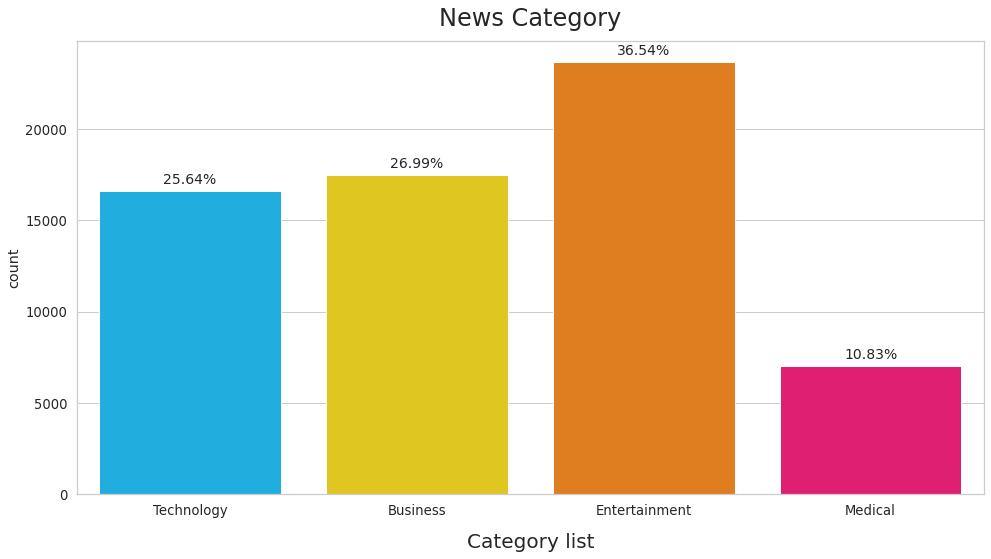

In [17]:
ax = sns.countplot(news_df['Category'])

for val in ax.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / news_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    ax.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=14, xytext=(0, 12), textcoords='offset points')
    
plt.title('News Category', fontsize=24, pad=15)
plt.xlabel('Category list', fontsize=20, labelpad=15)
plt.tight_layout()
plt.show()

### WordCloud

    Which words are used most often in each category?

In [18]:
tech_news = news_df[news_df['Category'] == 'Technology']['News Title']
business_news = news_df[news_df['Category'] == 'Business']['News Title']
entertaiment_news = news_df[news_df['Category'] == 'Entertainment']['News Title']
medical_news = news_df[news_df['Category'] == 'Medical']['News Title']

tech_news_text = ' '.join([text for text in tech_news])
business_news_text = ' '.join([text for text in business_news])
entertaiment_news_text = ' '.join([text for text in entertaiment_news])
medical_news_text = ' '.join([text for text in medical_news])

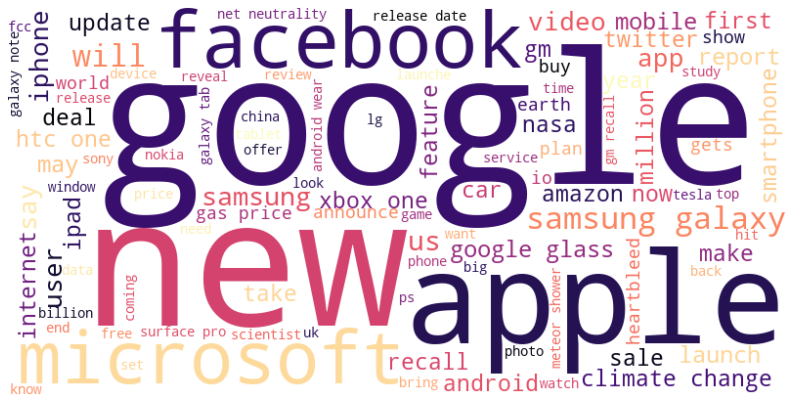

In [19]:
from wordcloud import WordCloud, ImageColorGenerator

tech_news_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=100).generate(tech_news_text)

plt.imshow(tech_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

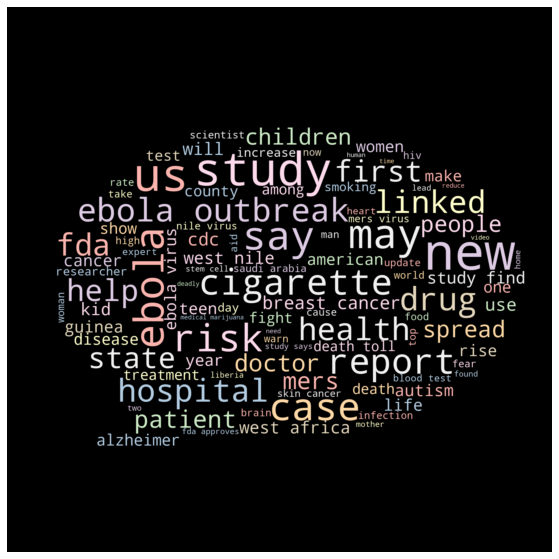

In [20]:
from PIL import Image

# Load image
mask = np.array(Image.open('../input/masks/masks-wordclouds/comment.png'))

medical_news_wordcloud = WordCloud(background_color='black', colormap='Pastel1', mask=mask, max_words=100).generate(medical_news_text)

plt.imshow(medical_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

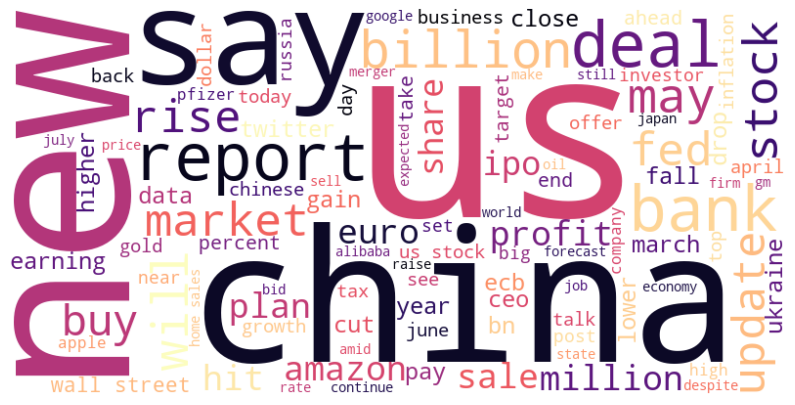

In [21]:
business_news_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=100).generate(business_news_text)

plt.imshow(business_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

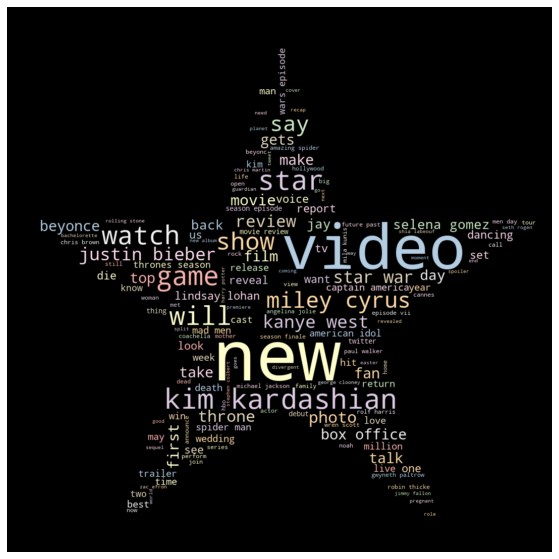

In [22]:
# Load image
mask = np.array(Image.open('../input/masks/masks-wordclouds/star.png'))

entertaiment_news_wordcloud = WordCloud(background_color='black', colormap='Pastel1', mask=mask, max_words=150).generate(entertaiment_news_text)

plt.imshow(entertaiment_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

### Problem no. 5: same words are often used in most category

* Above i found word **'new', 'say'** are often used in tech, business and entertaiment
* I decided to remove this kind of word for make our models more easier to make a classification

In [23]:
def delete_words(text):
    
    text = re.sub(r'new', ' ', text)
    text = re.sub(r'says?', ' ', text)
    
    tokenizer = text.split()
    
    return ' '.join([text for text in tokenizer])

news_df['News Title'] = news_df['News Title'].apply(delete_words)

## Data Cleaning finished, save then use it for our machine learning model input

In [24]:
news_df.drop('No', axis=1, inplace=True)

news_df.head()

,News Title,Category,text_length
0,google rolls out stories for tricked out photo playback,Technology,55
1,dov charney s redeeming quality,Business,31
2,white god adds un certain regard to the palm dog,Entertainment,48
3,google shows off androids for wearables cars tvs,Technology,48
4,china may bank loans at bln yuan,Business,36


In [25]:
news_df.to_csv('news_title_cleaned.csv', index=False)

## More deeper text analysis

* Analysis below proves that our dataset has a multi-labeled category
* I believe a lot of companies also use **multi-labeled category classification strategy** for handle this problem (i have not tried this before)
* Due to time limitation, i decided to only focus on **single-labeled category classification** for this project

In [26]:
news_df_cleaned = pd.read_csv('../input/gtect-project/news_title_cleaned.csv')

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

'''
https://www.kaggle.com/hervind/shoppe-sentiment-insight-eda
'''

def ngrams_top(corpus, ngram_range, n=None):

    vec = CountVectorizer(analyzer='word', ngram_range=ngram_range, min_df=1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    # sum_words[row, cols] -> only have 1 rows, but a lot of columns (list of words)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    total_list = words_freq[:n]
    df = pd.DataFrame(total_list,columns=['text', 'count'])
    return df


# just change category_list for more detail analisis
def merge_sentiment_ngrams(df, category_list=['Technology', 'Business', 'Entertainment', 'Medical'], ngram_range=(1, 1), n=None):
    df_full = ngrams_top(df['News Title'], ngram_range, n)
    
    for category in category_list:
        df_temp = ngrams_top(df.loc[df['Category'] == category, 'News Title'], ngram_range, n)
        df_temp.columns = ['text', category]
        
        df_full = df_full.merge(df_temp, on = 'text', how = 'outer')
        df_full = df_full.fillna(0)
        df_full[category] = df_full[category].astype(int)
        
    # only return word appear more than 5x
    df_full = df_full.loc[df_full['count'] >= 20]
    
    return df_full

# .style.background_gradient(cmap='Blues')

In [28]:
text_analysis_1 = merge_sentiment_ngrams(news_df_cleaned)

## Insight:

* When hear the word 'GOOGLE', people often associate it directly with technology, but our **Medical news title** also contains word 'GOOGLE'
* When hear the word 'AMAZON', we can associate it with technology, business and entertainment, because people know AMAZON does these 3 sectors
* When hear the word 'VIRUS', we can associate it with medical, but our news title dataset proved that **virus** also can be associate with business news

In [31]:
text_analysis_1.loc[[15, 19, 56, 72, 289, 92, 108, 205, 70, 42]]

,text,count,Technology,Business,Entertainment,Medical
15,google,1880,1731,123,8,18
19,apple,1623,1473,135,11,4
56,amazon,770,335,282,148,5
72,twitter,661,227,247,182,5
289,economy,256,13,240,3,0
92,ebola,593,0,0,1,592
108,cancer,528,0,34,40,454
205,virus,342,13,9,16,304
70,movie,673,6,7,659,1
42,kardashian,905,0,0,905,0


### Medical news title which contains word 'GOOGLE'

In [36]:
text_analysis = news_df_cleaned[news_df_cleaned['Category'] == 'Medical']
text_analysis[text_analysis['News Title'].str.contains('google')][['News Title', 'Category']].sample(5)

,News Title,Category
2490,google s next frontier what it means to be healthy,Medical
11298,google x begins baseline study to find illness as early as possible,Medical
46255,google asks what makes us healthy skeptics ask should google be the,Medical
29682,the quest to predict flu outbreaks moves from google to wikipedia,Medical
31795,google searches deeper into human body,Medical


### Business news title which contains word 'VIRUS'

In [33]:
text_analysis = news_df_cleaned[news_df_cleaned['Category'] == 'Business']
text_analysis[text_analysis['News Title'].str.contains('virus')][['News Title', 'Category']].sample(5)

,News Title,Category
36872,us bacon prices rise after virus kills pigs,Business
19741,pork prices on rise as virus takes toll on pig farms,Business
6380,symantec fires ceo as pc slump curbs antivirus sales,Business
55677,us bacon prices rise after virus kills baby pigs,Business
37415,virus causing bacon pork prices to soar,Business


### Entertaiment news title which contains word 'EBOLA'

In [37]:
text_analysis = news_df_cleaned[news_df_cleaned['Category'] == 'Entertainment']
text_analysis[text_analysis['News Title'].str.contains('ebola')][['News Title', 'Category']]

,News Title,Category
34324,senegal closes border with guinea over ebola fears,Entertainment


# Conclusion

* Because of **multi-labeled category**, it's impossible for our model to get PERFECT SCORE for single-label classification task
* Because of class imbalance problem, i choosed Macro F1-score for our model evaluation metrics
* For modeling, i decided to start from LSTM / GRU model with fast-text word embedding, then compare with Transformer model like BERT, ALBERT etc

<hr>

    For detail, please look my modeling kernel (seperated into LSTM / GRU and transformer), thanks a lot